In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import chi2
from scipy.optimize import minimize





In [45]:
k = 5
data = []
for i in range(100000):
    rv = np.random.normal(0, 1, k)
    rv_2 = rv**2
    data.append(np.sum(rv_2))
    
data = np.array(data)



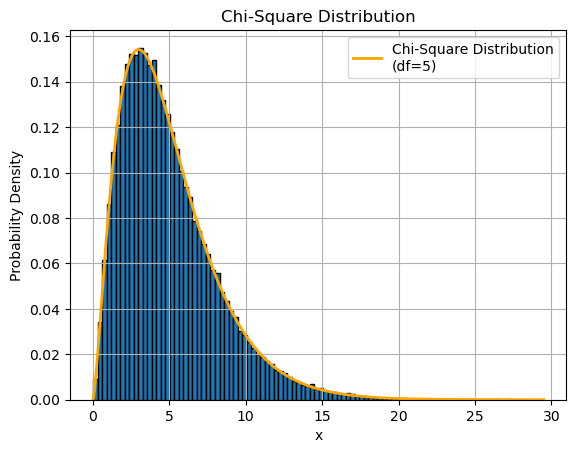

In [51]:
x = np.linspace(0, np.max(data), 1001)

y = chi2.pdf(x, k)


plt.plot(x, y, label=f'Chi-Square Distribution\n(df={k})', color='orange', linewidth=2)

plt.title('Chi-Square Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)


plt.hist(data, bins=np.linspace(np.min(data), np.max(data), 101), density=True, edgecolor="black");





In [69]:
alpha_true = 0
cov = np.array([[25., 0.,], [0., 25.]])
inv_cov = np.linalg.inv(cov)
np.random.seed(114514)
draws = np.random.multivariate_normal(mean=[alpha_true, alpha_true**2], cov=cov, size=20000)

alpha_range = np.linspace(-2, 2, 1001)




In [70]:
def min_chi_2(alpha_range, draws):
    chi_final = []
    for a in alpha_range:
        chi_array = np.zeros(draws.shape[0])
        for i in range(draws.shape[0]):
            diff = draws[i] - np.array([a, a**2])
            chi_2 = diff.T @ inv_cov @ diff    
            chi_array[i] = chi_2   
        chi_final.append(np.min(chi_array))
            
    return np.array(chi_final)

In [71]:
chi_final = min_chi_2(alpha_range, draws)

(1001,)


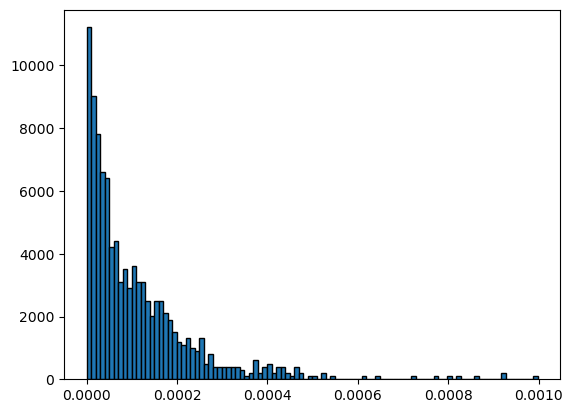

In [73]:
# print(chi_final)
print(chi_final.shape)
plt.hist(chi_final, density=True, bins=np.linspace(np.min(chi_final), np.max(chi_final), 101), edgecolor="black");

In [2]:
alpha_true = 0.
cov = np.array([[25., 0.], [0., 25.]])
inv_cov = np.linalg.inv(cov)

draws = np.random.multivariate_normal(mean=[alpha_true, alpha_true**2], cov=cov, size=10000)

def model_3_a(alpha):
    return np.array([alpha, alpha**2])


def compute_chi_2(d1, d2, alpha, model):
    mod = model(alpha)
    diff = np.array([d1 - mod[0], d2 - mod[1]])
    chi_2 = diff.T @ inv_cov @ diff  
    return chi_2  


def best_fit_alpha(d1, d2, model):
    chi_2_func = lambda alpha: compute_chi_2(d1, d2, alpha, model)
    result = minimize(chi_2_func, 0)
    return result.x[0]



In [9]:

alpha_arr = np.array([best_fit_alpha(d1, d2, model_3_a) for d1, d2 in draws])
chi2_arr = np.array([compute_chi_2(d1, d2, a, model_3_a) for a, (d1, d2) in zip(alpha_arr, draws)])

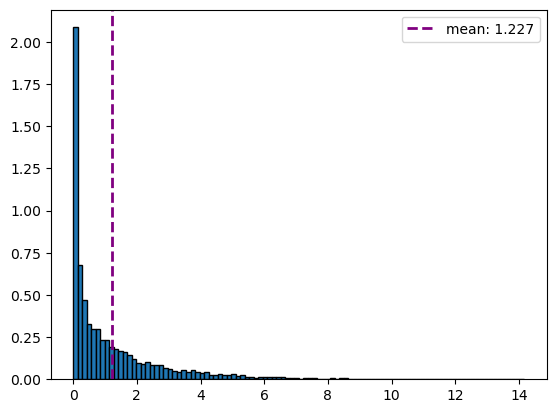

In [10]:
plt.hist(chi2_arr, bins=np.linspace(0, np.max(chi2_arr), 101), edgecolor="black", density=True);
plt.axvline(x=np.mean(chi2_arr), color="purple", linestyle="--", linewidth=2, label = f"mean: {np.mean(chi2_arr):.3f}")
# print(np.mean(chi2_arr))
plt.legend()

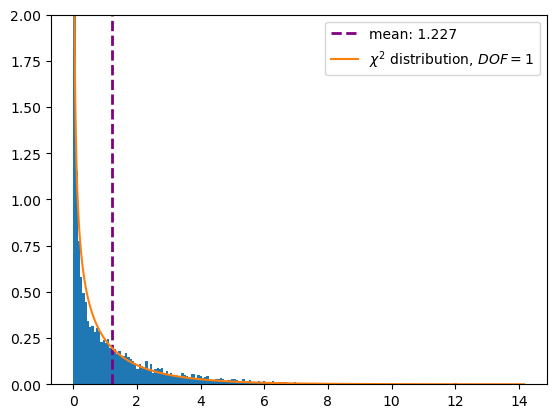

In [11]:
x_range = np.linspace(0, np.max(chi2_arr), 1001)

chi2_dist = chi2.pdf(x_range, 1)
plt.hist(chi2_arr, bins=np.linspace(0, np.max(chi2_arr), 201), density=True);
plt.axvline(x=np.mean(chi2_arr), color="purple", linestyle="--", linewidth=2, label = f"mean: {np.mean(chi2_arr):.3f}")
plt.plot(x_range, chi2_dist, label = "$\chi^2$ distribution, $DOF=1$")
plt.ylim(0, 2)

plt.legend()

# print(chi2_dist)


In [12]:
def model_3_c(alpha):
    return np.array([alpha, alpha])

In [6]:

alpha_arr_c = np.array([best_fit_alpha(d1, d2, model_3_c) for d1, d2 in draws])
chi2_arr_c = np.array([compute_chi_2(d1, d2, a, model_3_c) for a, (d1, d2) in zip(alpha_arr_c, draws)])

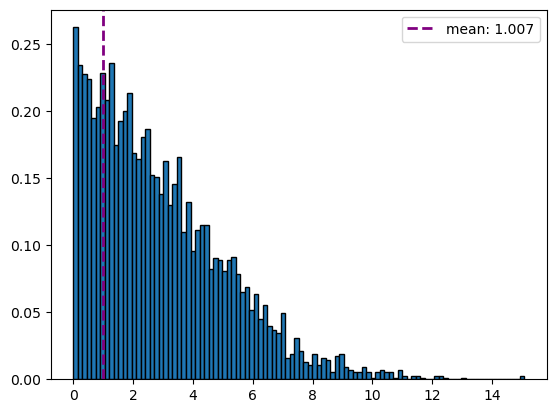

In [7]:
plt.hist(alpha_arr_c, bins=np.linspace(0, np.max(alpha_arr_c), 101), edgecolor="black", density=True);
plt.axvline(x=np.mean(chi2_arr_c), color="purple", linestyle="--", linewidth=2, label = f"mean: {np.mean(chi2_arr_c):.3f}")
# print(np.mean(chi2_arr))
plt.legend()

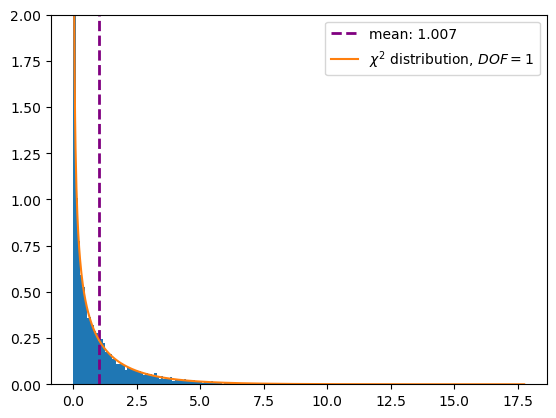

In [8]:
x_range_c = np.linspace(0, np.max(chi2_arr_c), 1001)

chi2_dist_c = chi2.pdf(x_range_c, 1)
plt.hist(chi2_arr_c, bins=np.linspace(0, np.max(chi2_arr_c), 201), density=True);
plt.axvline(x=np.mean(chi2_arr_c), color="purple", linestyle="--", linewidth=2, label = f"mean: {np.mean(chi2_arr_c):.3f}")
plt.plot(x_range_c, chi2_dist_c, label = "$\chi^2$ distribution, $DOF=1$")
plt.ylim(0, 2)

plt.legend()

# Problem 3

### Question A)